# Perform time series forecasting using XGBoost

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor

from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error

from joblib import dump
from joblib import load

In [50]:
df1 = pd.read_csv("./data/processed/mastercard_stock_history_processed.csv", parse_dates = True, index_col = ["Date"])
df1.head()

,Open,Volume,Close,month,day,quarter,lag_1,lag_2,MA,M_STD
Date,,,,,,,,,,
2006-06-27,4.418758,9.826000e+06,4.401083,6,1,2,4.418758,4.401703,4.312141,0.141078
2006-06-28,4.358291,8.756000e+06,4.368524,6,2,2,4.401083,4.418758,4.320963,0.137951
2006-06-29,4.367592,1.447000e+07,4.465270,6,3,2,4.368524,4.401083,4.329421,0.132547
2006-06-30,4.432710,2.596400e+07,4.465270,6,4,2,4.465270,4.368524,4.341824,0.126970
2006-07-01,4.440462,1.965233e+07,4.443563,7,5,3,4.465270,4.465270,4.351313,0.125130


## Modelling

In [51]:
# split data into last 20 days to predict as test data
df_train = df1.iloc[:-100]
df_test = df1.iloc[-100:]

X_train = df_train[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD"]]
# X_train = df_train[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD", "RSI", "AR", "BR"]][:-1]
y_train = df_train[["Close"]]
X_test = df_test[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD"]]
# X_test = df_test[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD", "RSI", "AR", "BR"]][:-1]
y_test = df_test[["Close"]]

In [52]:
model = XGBRegressor(objective = "reg:squarederror")
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Root mean squared error is: {np.sqrt(mse) : .2f}")

Root mean squared error is:  5.54


In [48]:
y_pred

array([375.6102 , 372.65634, 372.90067, 372.01163, 370.28043, 368.3701 ,
       371.34296, 371.41022, 376.05032, 371.02335, 383.07974, 381.66733,
       378.9379 , 381.70532, 380.32367, 364.13556, 365.70435, 373.10123,
       376.7321 , 379.23483, 379.40405, 380.35336, 380.9537 , 380.22552,
       377.38522, 384.3154 , 380.07242, 379.76984, 380.08118, 380.19275,
       374.9384 , 365.21283, 368.71286, 370.0866 , 376.2027 , 369.88016,
       369.85962, 369.56207, 365.5743 , 368.69894, 363.4271 , 363.42578,
       363.13345, 360.6068 , 361.82117, 359.61722, 361.8132 , 359.2221 ,
       355.03955, 355.60202, 363.1261 , 362.5519 , 364.22522, 359.62042,
       359.579  , 360.0011 , 358.76364, 351.69916, 352.99017, 341.95648,
       350.84344, 337.28738, 338.47443, 340.76218, 343.8516 , 344.2925 ,
       344.8353 , 354.00272, 354.36548, 352.1394 , 352.88647, 354.58484,
       353.96658, 343.14725, 343.76453, 339.124  , 341.3389 , 337.39038,
       336.80673, 339.002  , 337.43558, 340.58517, 

Plot the predicted and actual data

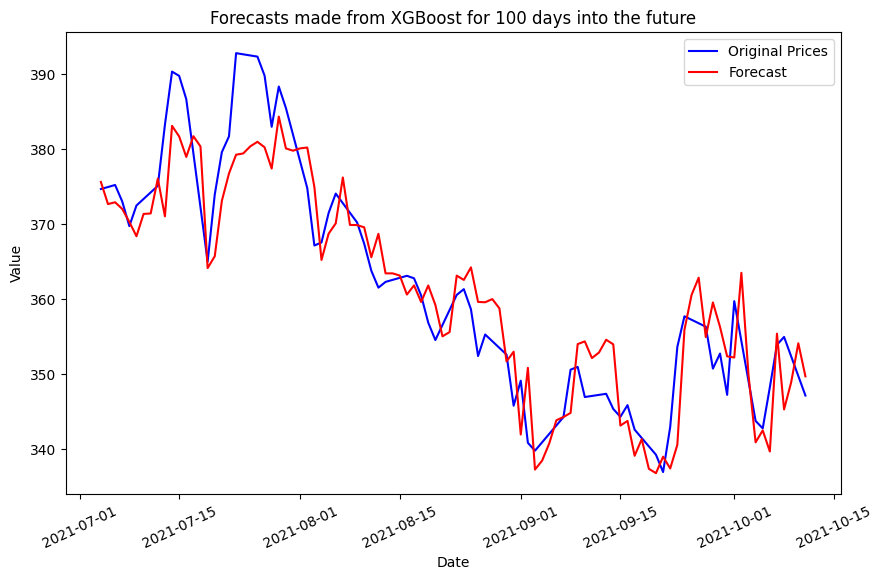

In [49]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label = "Original Prices", color = "blue")
plt.plot(X_test.index, y_pred, label = "Forecast", color = "red")

# Add labels and title
plt.title("Forecasts made from XGBoost for 100 days into the future")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 25)
plt.legend()

# Show the plot
plt.show()

We can see that the XGBoost model is much better at predicting the time series compared to ARIMA in the modelling notebook, as we get a much lower MSE

## Save the model

In [18]:
dump(model, "./models/XGBRegressor.pkl")

['./models/XGBRegressor.pkl']

In [19]:
# test loading of model
test_model = load("./models/XGBRegressor.pkl")

In [20]:
test_model.predict(X_test)

array([375.61017, 372.6563 , 372.90063, 372.0116 , 370.2804 , 368.37006,
       371.34293, 371.4102 , 376.0503 , 371.02332, 383.0797 , 381.6673 ,
       378.93787, 381.7053 , 380.32364, 364.13553, 365.7043 , 373.10123,
       376.73206, 379.2348 , 379.40402, 380.35333, 380.95367, 380.2255 ,
       377.3852 , 384.31537, 380.0724 , 379.7698 , 380.08115, 380.19272,
       374.93835, 365.2128 , 368.71283, 370.08658, 376.20267, 369.88013,
       369.8596 , 369.56204, 365.57428, 368.69894, 363.4271 , 363.42578,
       363.13345, 360.6068 , 361.82117, 359.61722, 361.8132 , 359.2221 ,
       355.03955, 355.60202, 363.1261 , 362.5519 , 364.22522, 359.62042,
       359.579  , 360.0011 , 358.76364, 351.69916, 352.99017, 341.95648,
       350.84344, 337.28738, 338.47443, 340.76218, 343.8516 , 344.2925 ,
       344.8353 , 354.00272, 354.36548, 352.1394 , 352.88647, 354.58484,
       353.96658, 343.14725, 343.76453, 339.124  , 341.3389 , 337.39038,
       336.80673, 339.002  , 337.43558, 340.58517, 

Our model can be saved and loaded successfully.

## Tune the XGB model

In [21]:
search_space = {
    'eta': [0.1, 0.2, 0.3, 0.4, 0.5],
    'min_split_loss': [2, 5, 10, 20, 30],
    'max_depth': [5, 10, 15, 20, 30],
    'reg_lambda': [1, 2, 5, 10],
    'reg_alpha': [1, 2, 3, 10]
}

best_params = {
    "eta": 0,
    "min_split_loss": 0,
    "max_depth": 0,
    "reg_lambda": 0,
    "reg_alpha": 0
}

best_model = XGBRegressor(random_state = 42)

best_rmse = 10000000

scores = []

i = 0
j = 0
stop = False

for e in search_space['eta']:
    if stop: break
    for sl in search_space['min_split_loss']:
        if stop: break
        for max_d in search_space['max_depth']:
            if stop: break
            for l in search_space['reg_lambda']:
                if stop: break
                for alpha in search_space['reg_alpha']:
                    model = XGBRegressor(
                        objective = "reg:squarederror",
                        eta = e,
                        min_split_loss = sl,
                        max_depth = max_d,
                        reg_lambda = l,
                        reg_alpha = alpha,
                        random_state = 42
                    )

                    model.fit(X_train, y_train)
                    y_pred = model.predict(X_test)
                    mse = mean_squared_error(y_test, y_pred)

                    scores.append(np.sqrt(mse))

                    # update parameters if get better RMSE
                    if np.sqrt(mse) < best_rmse:
                        print(f"New best RMSE of validation set is: {np.sqrt(mse)}")
                        best_rmse = np.sqrt(mse)
                        best_params['eta'] = e
                        best_params['min_split_loss'] = sl
                        best_params['max_depth'] = max_d
                        best_params['reg_lambda'] = l
                        best_params['reg_alpha'] = alpha

                        print(best_params)

                        best_model = model

                    # implement early stopping if after 10 rounds, no more significant improvements in rmse
                    if len(scores) > 1 and (scores[i] > scores[i - 1] or abs(scores[i] - scores[i - 1]) < 0.1):
                        j += 1
                    else:
                        j = 0

                    if j == 10:
                        stop = True
                        break
                    
                    i += 1

New best RMSE of validation set is: 4.971776030569454
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 5, 'reg_lambda': 1, 'reg_alpha': 1}
New best RMSE of validation set is: 4.948973715128027
{'eta': 0.1, 'min_split_loss': 2, 'max_depth': 5, 'reg_lambda': 1, 'reg_alpha': 10}
New best RMSE of validation set is: 4.839359135372994
{'eta': 0.1, 'min_split_loss': 5, 'max_depth': 5, 'reg_lambda': 1, 'reg_alpha': 1}


In [22]:
best_params

{'eta': 0.1,
 'min_split_loss': 5,
 'max_depth': 5,
 'reg_lambda': 1,
 'reg_alpha': 1}

In [23]:
best_model = XGBRegressor(
    random_state = 42,
    **best_params
)

best_model.fit(X_train, y_train)

y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Best root mean squared error is: {np.sqrt(mse) : .2f}")

Best root mean squared error is:  4.84


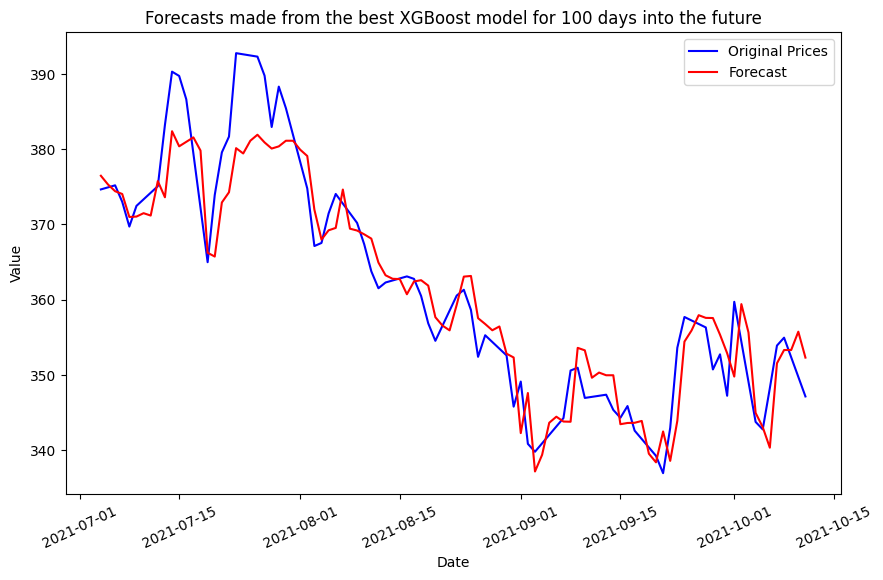

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label = "Original Prices", color = "blue")
plt.plot(X_test.index, y_pred, label = "Forecast", color = "red")

# Add labels and title
plt.title("Forecasts made from the best XGBoost model for 100 days into the future")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 25)
plt.legend()

# Show the plot
plt.show()

## Save the best XGB model

In [25]:
dump(best_model, "./models/best_XGBRegressor.pkl")

['./models/best_XGBRegressor.pkl']

## Use tuned model on test data

In [54]:
model = load("./models/best_XGBRegressor.pkl")

In [56]:
test_df = pd.read_csv("./data/processed/mastercard_test_processed.csv", parse_dates = True, index_col = ["Date"])
test_df.head()

,Open,Volume,Close,month,day,quarter,lag_1,lag_2,MA,M_STD
Date,,,,,,,,,,
2021-11-14,362.113333,4.703532e+06,362.073333,11,6,4,362.786667,363.500000,349.390222,11.515804
2021-11-15,365.140000,4.693196e+06,361.360000,11,0,4,362.073333,362.786667,349.592667,11.688103
2021-11-16,364.770000,4.969009e+06,369.560000,11,1,4,361.360000,362.073333,349.744222,11.813762
2021-11-17,359.580000,1.172727e+07,359.170000,11,2,4,369.560000,361.360000,350.142000,12.280022
2021-11-18,360.730000,6.534921e+06,348.220000,11,3,4,359.170000,369.560000,350.166333,12.297742


In [57]:
# just use 100 observations into the future
test_df = test_df[:100]

In [58]:
X_test = test_df[["Open", "Volume", "month", "day", "quarter", "lag_1", "lag_2", "MA", "M_STD"]]
y_test = test_df[["Close"]]

In [59]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Root mean squared error is: {np.sqrt(mse) : .2f}")

Root mean squared error is:  7.36


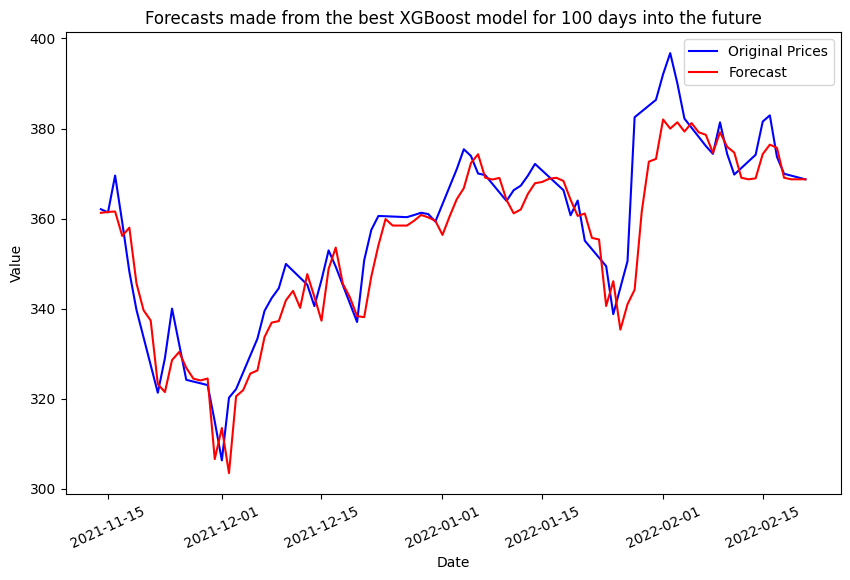

In [60]:
plt.figure(figsize=(10, 6))
plt.plot(X_test.index, y_test, label = "Original Prices", color = "blue")
plt.plot(X_test.index, y_pred, label = "Forecast", color = "red")

# Add labels and title
plt.title("Forecasts made from the best XGBoost model for 100 days into the future")
plt.xlabel("Date")
plt.ylabel("Value")
plt.xticks(rotation = 25)
plt.legend()

# Show the plot
plt.show()